# Predicting heart disease using machine learning

This notebook loos into using various python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes

We are going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features 
5. Modelling
6. Experimentation

## 1. Problem Definition 

In a statement, 
> Given clinical parameters about a patient, can we predict or not they have heart disease?

## 2. Data

The original data came from Cleaveland data from the UCI Machine Learning Repository. 
https://archive.ics.uci.edu/dataset/45/heart+disease

There is also a version of it available on Kaggle. https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

## 3. Evaluation 

>  If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

This is where you get different informtion about different information about each of the features in your data.

**Create data dictionary**

* id (Unique id for each patient)
* age (Age of the patient in years)
* origin (place of study)
* sex (Male/Female)
* cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
*  trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* chol (serum cholesterol in mg/dl)
* fbs (if fasting blood sugar > 120 mg/dl)
* restecg (resting electrocardiographic results)
* thalach: maximum heart rate achieved
* exang: exercise-induced angina (True/ False)
* oldpeak: ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
* ca: number of major vessels (0-3) colored by fluoroscopy
* thal: [normal; fixed defect; reversible defect]
* target: the predicted attribute



## Preparing the tools

We're going to use pandas, matplotlib, and numpay for data analysis and manipulation.

In [124]:
#import all the tools we need

#Regular EDA (Exploratory data analysis) and plotting libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#we want our plots to appear inside the notebook
%matplotlib inline  

#Models from Scikit-learn
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 

#Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay, roc_curve, auc



## Load data

In [5]:
df = pd.read_csv("heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter expert on the dataset you're working with.

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [8]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

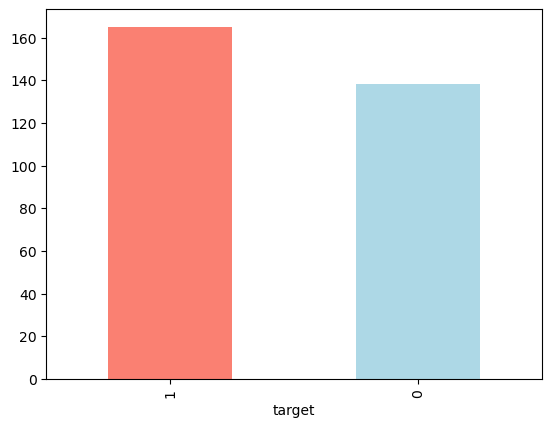

In [13]:
# so we have a balanced dataset 
df["target"].value_counts().plot(
    kind="bar",
    color=['salmon','lightblue'],
                                );

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [15]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [16]:
# no missing values in the df

In [17]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequencey according to sex

In [20]:
df.sex.value_counts() #female 0 male 1

sex
1    207
0     96
Name: count, dtype: int64

In [21]:
# Compare target column with sex column 
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


In [27]:
#What do we infer from this?
# 1. number of females with heart disease 72/303
# 2. number of females without heart disease 24/303
# 3. number of males with heart disease 93/303
# 4. number of males without heart disease 114/303
#in percentages:
72/96 * 100, 24/96 * 100, 93/207 * 100, 114/207 * 100

(75.0, 25.0, 44.927536231884055, 55.072463768115945)

In [28]:
# what we can tell is that if we have a female there's 75% chance she has a heart disease (based on our dataset)
# if the participant is male there's a 44% chance he has a heart disease
# total people with heart disease 165/303
165/303 * 100

54.45544554455446

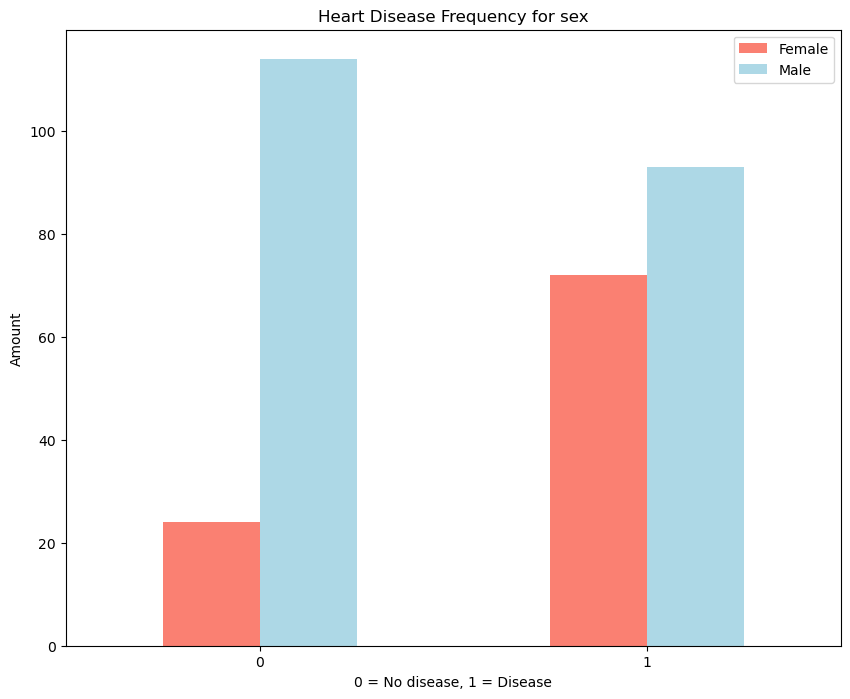

In [33]:
pd.crosstab(df.target,df.sex).plot(kind="bar", figsize=(10,8), color=["salmon","lightblue"])
plt.title("Heart Disease Frequency for sex")
plt.xlabel("0 = No disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

In [40]:
pd.crosstab(df.thalach,df.target)

target,0,1
thalach,,
71,1,0
88,1,0
90,1,0
95,1,0
96,1,1
...,...,...
190,0,1
192,0,1
194,0,1


In [41]:
df.thalach.value_counts()

thalach
162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: count, Length: 91, dtype: int64

### Age vs. Max Heart Rate for Heart Disease

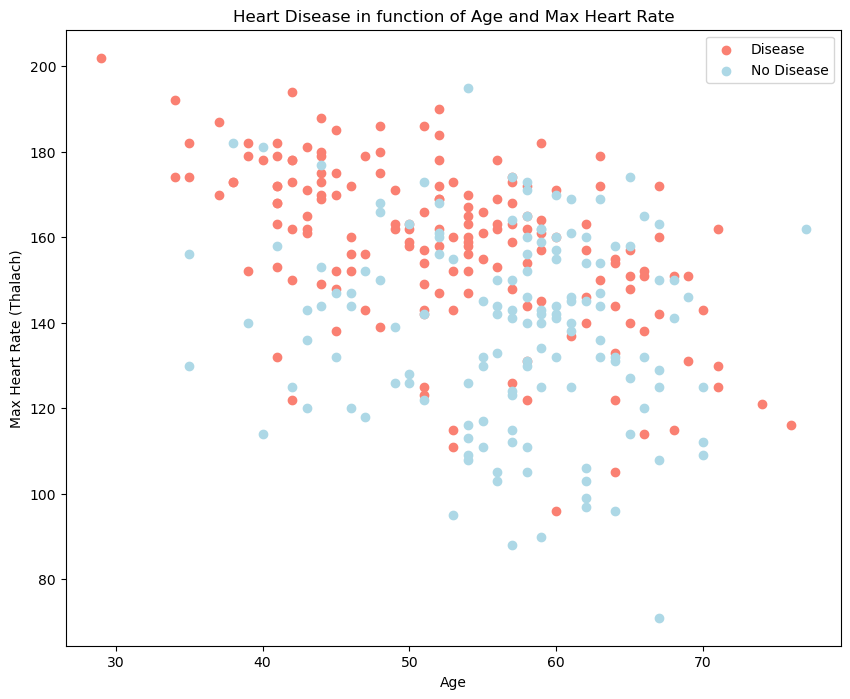

In [50]:
plt.figure(figsize=(10,8))

#scatter with positive examples
plt.scatter(df.age[df.target==1], df.thalach[df.target==1], color="salmon");

#scatter with negative examples
plt.scatter(df.age[df.target==0], df.thalach[df.target==0], color="lightblue");
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate (Thalach)")
plt.legend(["Disease","No Disease"]);


<Axes: ylabel='Frequency'>

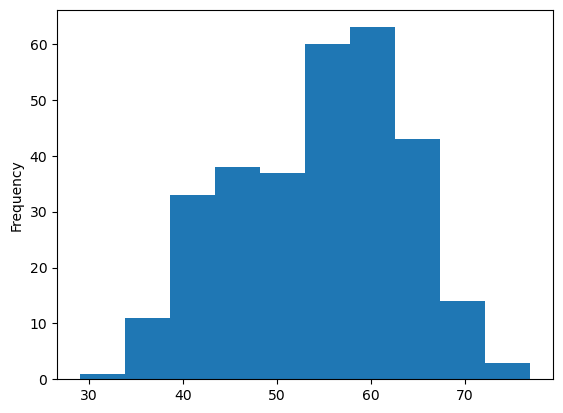

In [51]:
#check the distribution of the age column with a histogram
df.age.plot.hist()

### Heart Disease Frequency per Chest Pain Type

In [54]:
df.cp.value_counts()

#0 cp: typical angina: chest pain related decresses blood supply to the heart
#1 cp: atypical angina: chest pain not related to heart
#2 cp: non-anginal pain: typically esophageal spasms (non heart related)
#3 cp: asymptomatic: chest pain not showing signs of disease


cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64

In [57]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


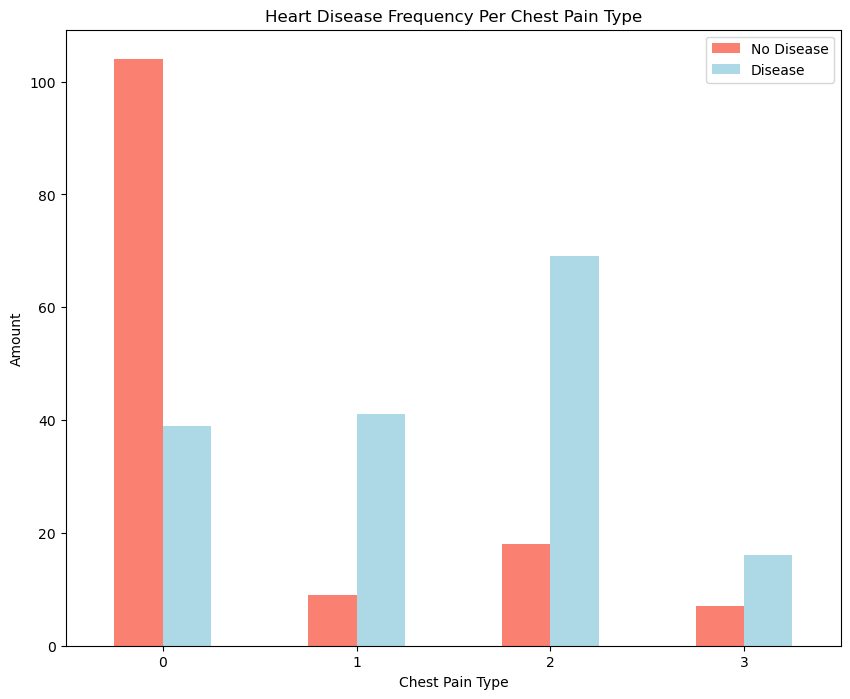

In [60]:
# make the crosstab more visual 
pd.crosstab(df.cp, df.target).plot(kind="bar",figsize=(10,8), color=["salmon","lightblue"])
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation=0);

In [61]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [62]:
#Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


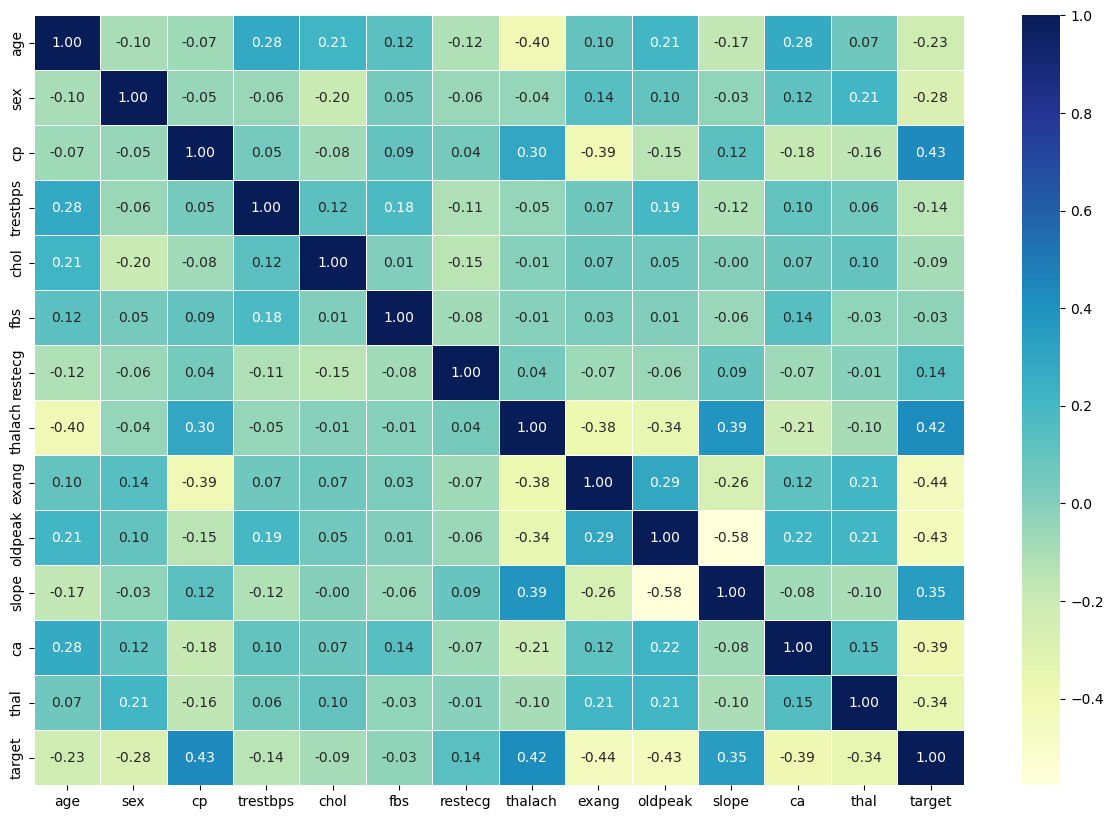

In [64]:
# Correlation matrix more visual
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix, annot = True, linewidths=0.5, fmt='.2f', cmap = 'YlGnBu');

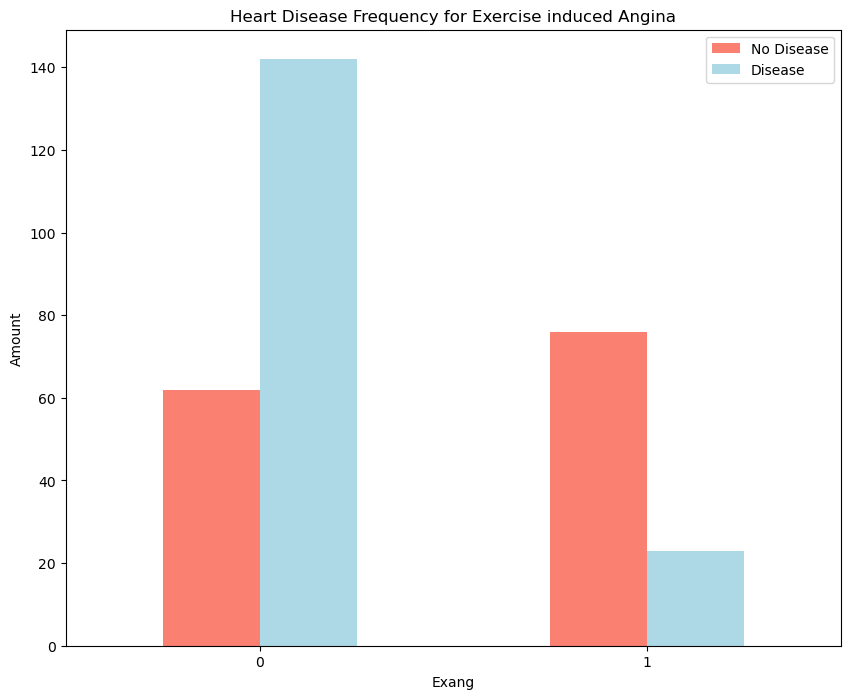

In [68]:
# a higher positive value means a potential positive correlation
# a higher negative value means a potential negative correlation
# for example the correlation between cp column and target is 0.43
#that means when cp goes up target value also increases (positve correlation)
# negative correlation = a relationship between two variables in which one variable increases as the other decreases

# make the negative correlation more visual 
pd.crosstab(df.exang, df.target).plot(kind="bar",figsize=(10,8), color=["salmon","lightblue"])
plt.title("Heart Disease Frequency for Exercise induced Angina")
plt.xlabel("Exang")
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation=0);
#as target increases exang decreases 

## 5. Modelling


In [69]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [70]:

X = df.drop("target",axis=1)
y = df["target"]

In [71]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [72]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [73]:
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)




In [74]:
# what model should we use???

We are going to try 3 different machine learning models:
1. Logestic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [76]:
models = {
    'LogesticRegression': LogisticRegression(),
    'KNN':KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier()
}

In [79]:
# create a function to fit and score models
def fit_and_score(models,X_train,X_test,y_train,y_test):
    """ 
    Fits and evaluates machine learning models.
    """
    np.random.seed(42)
    model_scores={}
    for name, model in models.items():
        model.fit(X_train,y_train)
        model_scores[name] = model.score(X_test,y_test)
    
    return model_scores


In [84]:
model_scores = fit_and_score(models,X_train,X_test,y_train,y_test)
model_scores

C:\Users\laraq\OneDrive\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LogesticRegression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model comparison

<Axes: >

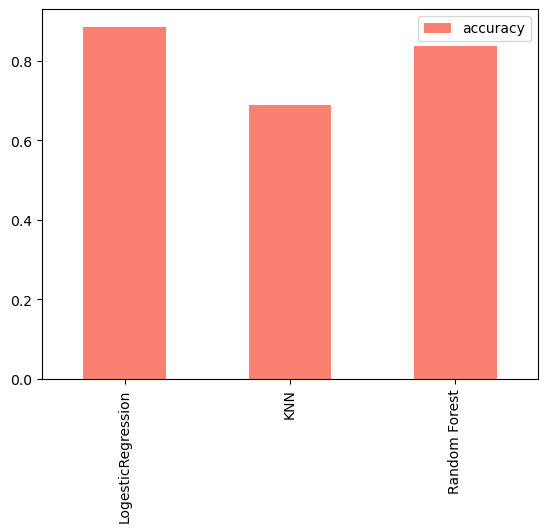

In [83]:
model_compare = pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar(color="salmon")

now that we've got a baseline model... and we know a model;s first prediction are'nt always what we should base our next steps off... what should we do?

Let's look at the following:
* hyperparameter tuning
* feature importance 
* confusion matrix
* cross validation
* recall 
* f1 score
* classification report 
* ROC curve
* area under the curve (AUC)

## Hyperparameter tuning

In [85]:
#let's tune KNN

train_scores = []
test_scores = []

#create a list of different values for n_neighbors
neighbors = range(1,21)

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors= i)
    knn.fit(X_train,y_train)
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))
    

In [87]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [88]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

max KNN accuracy score on test data: 75.41%


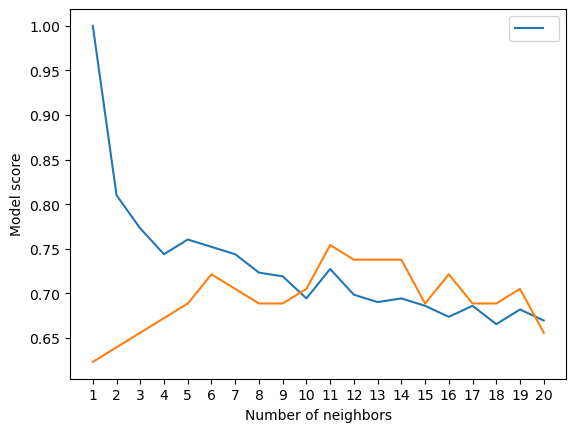

In [94]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend([""])

print(f"max KNN accuracy score on test data: {max(test_scores)*100:.2f}%")


In [95]:
# accuracy score went from 68% to 75% but other models did better so discard KNN

In [96]:
#this is all part of the experiment process

## Hyperparameter tuning with RandomizedSearchCV

we're going to tune:
* LogesticRegression()
* RandomForestClassifier()
... using randomized search cv


In [104]:
# create a hyperparameter grid for logestic regression
log_reg_grid = {
    'C': np.logspace(-4,4,20),
    'solver': ["liblinear"]
}

# create a hyperparameter grid for RandomForestClassifier

rf_grid = {
      "n_estimators": np.arange(10,1000,50),
      "max_depth": [None,3,5,10],
      "min_samples_split" : np.arange(2,20,2),
      "min_samples_leaf": np.arange(1,20,2)
}

In [100]:
#Tune logistic regression
np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                                n_iter=20,
                               verbose=True)

rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [101]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [102]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

In [106]:
np.random.seed(42)
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                               param_distributions=rf_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

rs_rf.fit(X_train,y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [107]:
rs_rf.score(X_test,y_test)

0.8688524590163934

In [109]:
# model improved from 84% to 87%

In [111]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

## Hyperparameter tuning with GridSearchCV

since our logesticRegression model provides the best scores so far, we'll try and improve them again using GridSearchCV

In [113]:
#different hyperparameters for our models
log_reg_grid = {
    'C': np.logspace(-4,4,30),
    'solver': ["liblinear"]
}

gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid= log_reg_grid,
                         cv=5,
                         verbose = True
                         )

gs_log_reg.fit(X_train,y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [114]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [115]:
gs_log_reg.score(X_test,y_test)

0.8852459016393442

## Evaluating our tuned machine learning classifier, beyond accuracy 

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1 score
... and it would be great if cross validation was used where possible

To make comparisons and evaluate our trained model, first we need to make predictions

In [116]:
y_preds = gs_log_reg.predict(X_test)

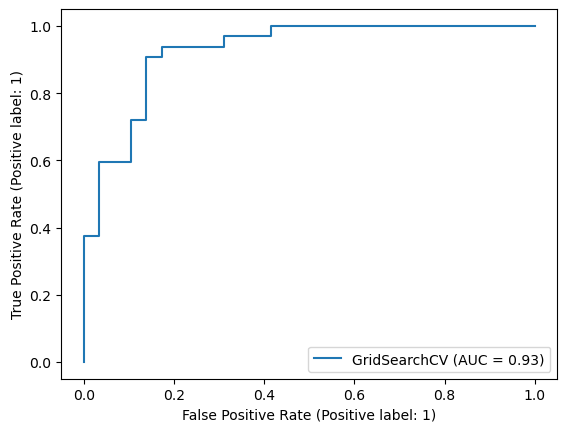

In [128]:
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test);

In [137]:
# confusion matrix
confusion_matrix(y_test,y_preds)
y_test.sum(),y_preds.sum()

(32, 33)

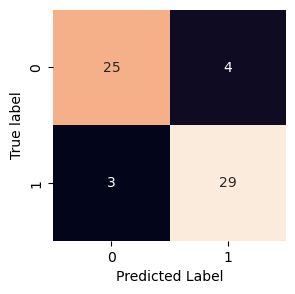

In [131]:
def plot_conf_mat(y_test,y_preds):
    """
    Plot a confusion matrix
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                    annot = True, cbar=False)
    
    plt.xlabel("Predicted Label")
    plt.ylabel("True label")
    
plot_conf_mat(y_test,y_preds)

In [133]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [134]:
#classification report is done on one set of data 
# we need a cross validation score on precsion, recall, and f1 score

## Calculate evaluation metrics using cross validation


In [138]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [139]:
clf = LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [141]:
cv_acc = cross_val_score(clf,X,y, cv=5, scoring='accuracy')
cv_acc.mean()

0.8446994535519124

In [142]:
cv_prc = cross_val_score(clf,X,y, cv=5, scoring='precision')
cv_prc.mean()

0.8207936507936507

In [143]:
cv_rec = cross_val_score(clf,X,y, cv=5, scoring='recall')
cv_rec.mean()

0.9212121212121213

In [144]:
cv_f1 = cross_val_score(clf,X,y, cv=5, scoring='f1')
cv_f1.mean()

0.8673007976269721

In [146]:
scoring = pd.DataFrame({'accuracy':cv_acc.mean(), 'recall':cv_rec.mean(),'precision':cv_prc.mean(),'f1 score':cv_f1.mean()}, index=[0])
scoring

,accuracy,recall,precision,f1 score
0,0.844699,0.921212,0.820794,0.867301


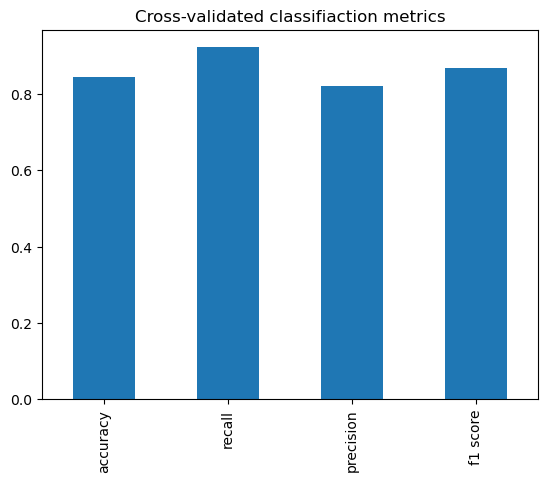

In [147]:
scoring.T.plot.bar(title='Cross-validated classifiaction metrics', legend=False);

## Feature Importance

is another way of asking 'which features contribute most to the outcomes of the model and how did they contribute?'

finding feature importance is different for each machine learning model

In [150]:
# feature importance in logistic regression
gs_log_reg.best_params_

clf = LogisticRegression(C=0.20433597178569418 , solver = 'liblinear')

clf.fit(X_train,y_train);

In [151]:
clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [152]:
feature_dict = dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

In [153]:
# it shows us how much each column contributes to predicting the target value

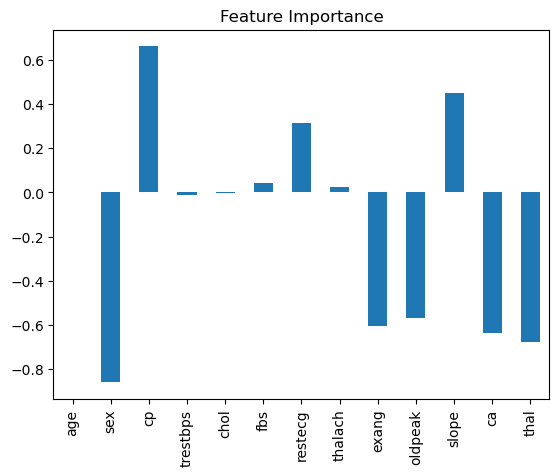

In [155]:
feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title='Feature Importance', legend=False);

In [156]:
pd.crosstab(df.sex,df.target)

target,0,1
sex,,
0,24,72
1,114,93


In [157]:
# we look at the ratio !! (when sex value goes down target goes up)

## 6. Experimentation

if you haven't evaluated your evaluation metric yet... ask yourself... 
* Could you collect more data?
* Could you try a better model? like catboost or xgboost
* Could you improve the current models? (beyound what we've done so far)
* If your model is good enough (you have hit your evaluation metric), how would you export it asn share it with others?
